In [113]:
import geopandas as gpd
import pandas as pd
import plotly.express as px
import matplotlib.pyplot as plt
import descartes
from shapely.geometry import Point, Polygon
from pathlib import Path

In [92]:
#get the 2010 census tracts in NYC
cenTract = gpd.read_file('../Data/NYC/CensusTracts/NYC_Census_Tracts_for_2010_US_Census/NYC_Census_Tracts_for_2010_US_Census.shp')

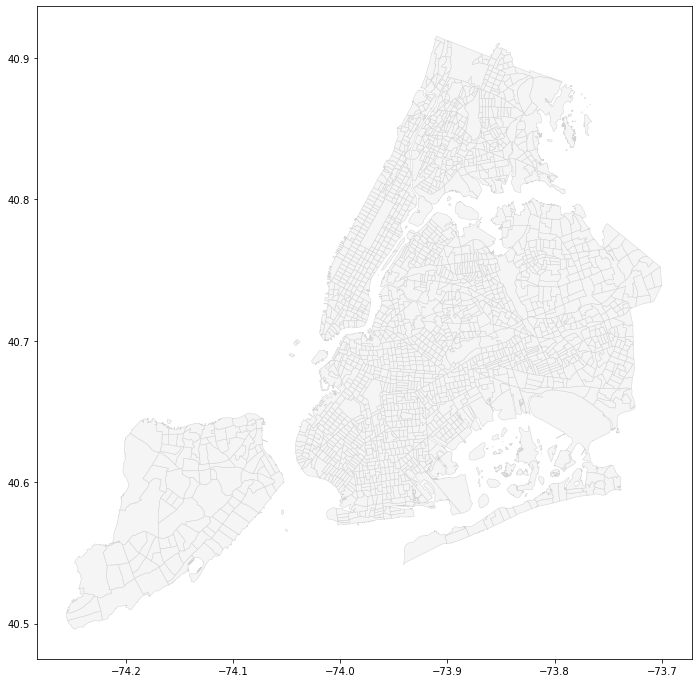

In [4]:
ax = cenTract.plot(figsize = (15, 12), color = "whitesmoke", edgecolor = "lightgrey", linewidth = 0.5)

In [93]:
#removing staten island census tracts because they are not in the bike data
cenTract = cenTract[cenTract['BoroName'] != 'Staten Island']

In [12]:
cenTract

,OBJECTID,CTLabel,BoroCode,BoroName,CT2010,BoroCT2010,CDEligibil,NTACode,NTAName,PUMA,Shape__Are,Shape__Len,geometry
1,2,98,1,Manhattan,009800,1009800,I,MN19,Turtle Bay-East Midtown,3808,1.906016e+06,5534.199811,"POLYGON ((-73.96433 40.75639, -73.96479 40.755..."
2,3,102,1,Manhattan,010200,1010200,I,MN17,Midtown-Midtown South,3807,1.860993e+06,5687.802439,"POLYGON ((-73.97124 40.76094, -73.97170 40.760..."
3,4,104,1,Manhattan,010400,1010400,I,MN17,Midtown-Midtown South,3807,1.864600e+06,5693.036367,"POLYGON ((-73.97446 40.76230, -73.97492 40.761..."
4,5,113,1,Manhattan,011300,1011300,I,MN17,Midtown-Midtown South,3807,1.890907e+06,5699.860641,"POLYGON ((-73.98412 40.75485, -73.98460 40.754..."
5,6,114.02,1,Manhattan,011402,1011402,I,MN40,Upper East Side-Carnegie Hill,3805,1.063547e+06,4125.256029,"POLYGON ((-73.96476 40.76407, -73.96521 40.763..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2160,2161,48,1,Manhattan,004800,1004800,I,MN21,Gramercy,3808,1.920852e+06,5539.378859,"POLYGON ((-73.98021 40.73439, -73.98038 40.734..."
2161,2162,506,3,Brooklyn,050600,3050600,E,BK42,Flatbush,4015,1.771606e+06,6696.151115,"POLYGON ((-73.96219 40.64980, -73.96308 40.649..."
2162,2163,508.01,3,Brooklyn,050801,3050801,E,BK42,Flatbush,4015,8.437396e+05,3754.807787,"POLYGON ((-73.95871 40.65040, -73.95998 40.650..."
2163,2164,157,1,Manhattan,015700,1015700,I,MN14,Lincoln Square,3806,1.958587e+06,5778.309362,"POLYGON ((-73.97500 40.77754, -73.97546 40.776..."


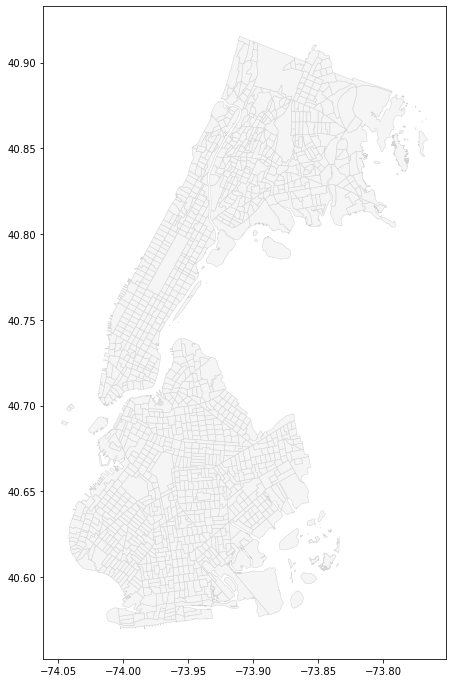

In [13]:
ax = cenTract.plot(figsize = (15, 12), color = "whitesmoke", edgecolor = "lightgrey", linewidth = 0.5)

In [54]:
#get the station locations from June 2013
nyc_201306_df = pd.read_csv('../Data/NYC/TripData/201306-citibike-tripdata.csv')
nyc_201306_df

,tripduration,starttime,stoptime,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bikeid,usertype,birth_year,gender
0,695,6/1/13 0:00,6/1/13 0:11,444,Broadway & W 24 St,40.742354,-73.989151,434.0,9 Ave & W 18 St,40.743174,-74.003664,19678,Subscriber,1983.0,1
1,693,6/1/13 0:00,6/1/13 0:11,444,Broadway & W 24 St,40.742354,-73.989151,434.0,9 Ave & W 18 St,40.743174,-74.003664,16649,Subscriber,1984.0,1
2,2059,6/1/13 0:00,6/1/13 0:35,406,Hicks St & Montague St,40.695128,-73.995951,406.0,Hicks St & Montague St,40.695128,-73.995951,19599,Customer,NaN,0
3,123,6/1/13 0:01,6/1/13 0:03,475,E 15 St & Irving Pl,40.735243,-73.987586,262.0,Washington Park,40.691782,-73.973730,16352,Subscriber,1960.0,1
4,1521,6/1/13 0:01,6/1/13 0:26,2008,Little West St & 1 Pl,40.705693,-74.016777,310.0,State St & Smith St,40.689269,-73.989129,15567,Subscriber,1983.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
577698,925,6/30/13 23:59,7/1/13 0:14,509,9 Ave & W 22 St,40.745497,-74.001971,462.0,W 22 St & 10 Ave,40.746920,-74.004519,15250,Subscriber,1964.0,1
577699,279,6/30/13 23:59,7/1/13 0:04,116,W 17 St & 8 Ave,40.741776,-74.001497,494.0,W 26 St & 8 Ave,40.747348,-73.997236,19411,Customer,NaN,0
577700,161,6/30/13 23:59,7/1/13 0:02,443,Bedford Ave & S 9 St,40.708531,-73.964090,282.0,Kent Ave & S 11 St,40.707645,-73.968415,18910,Subscriber,1972.0,2
577701,909,6/30/13 23:59,7/1/13 0:14,509,9 Ave & W 22 St,40.745497,-74.001971,462.0,W 22 St & 10 Ave,40.746920,-74.004519,16108,Customer,NaN,0


In [55]:
stations_201306_df = nyc_201306_df.drop_duplicates(subset='start_station_id')
stations_201306_df = stations_201306_df.reset_index()
stations_201306_df = stations_201306_df.drop(columns=['index', 'tripduration', 'starttime', 'stoptime', 'bikeid',
                                                      'usertype','birth_year','gender','end_station_id', 'end_station_name',
                                                     'end_station_latitude', 'end_station_longitude'])
stations_201306_df = stations_201306_df.rename(columns = {'start_station_id':'station_id', 'start_station_name': 'station_name',
                                                         'start_station_latitude': 'lat', 'start_station_longitude': 'long'})
stations_201306_df

,station_id,station_name,lat,long
0,444,Broadway & W 24 St,40.742354,-73.989151
1,406,Hicks St & Montague St,40.695128,-73.995951
2,475,E 15 St & Irving Pl,40.735243,-73.987586
3,2008,Little West St & 1 Pl,40.705693,-74.016777
4,485,W 37 St & 5 Ave,40.750380,-73.983390
...,...,...,...,...
332,248,Laight St & Hudson St,40.721854,-74.007718
333,387,Centre St & Chambers St,40.712733,-74.004607
334,3000,MLSWKiosk,40.755467,-73.986536
335,160,E 37 St & Lexington Ave,40.748158,-73.978462


In [56]:
end_stations_201306_df = nyc_201306_df.drop_duplicates(subset='end_station_id')
end_stations_201306_df = end_stations_201306_df.reset_index()
end_stations_201306_df = end_stations_201306_df.drop(columns=['index', 'tripduration', 'starttime', 'stoptime', 
                                                              'bikeid','usertype','birth_year','gender', 'start_station_id',
                                                             'start_station_name','start_station_latitude','start_station_longitude'])
end_stations_201306_df = end_stations_201306_df.rename(columns={'end_station_id':'station_id', 'end_station_name': 'station_name',
                                                               'end_station_latitude': 'lat', 'end_station_longitude': 'long'})
end_stations_201306_df

,station_id,station_name,lat,long
0,434.0,9 Ave & W 18 St,40.743174,-74.003664
1,406.0,Hicks St & Montague St,40.695128,-73.995951
2,262.0,Washington Park,40.691782,-73.973730
3,310.0,State St & Smith St,40.689269,-73.989129
4,532.0,S 5 Pl & S 5 St,40.710451,-73.960876
...,...,...,...,...
333,431.0,Hanover Pl & Livingston St,40.688646,-73.982634
334,3000.0,MLSWKiosk,40.755467,-73.986536
335,409.0,DeKalb Ave & Skillman St,40.690649,-73.956431
336,160.0,E 37 St & Lexington Ave,40.748158,-73.978462


In [57]:
nyc_201306_stations_df = pd.concat([stations_201306_df, end_stations_201306_df])
nyc_201306_stations_df = nyc_201306_stations_df.drop_duplicates(subset='station_id')
nyc_201306_stations_df = nyc_201306_stations_df.reset_index()
nyc_201306_stations_df = nyc_201306_stations_df.drop(columns=['index'])
nyc_201306_stations_df = nyc_201306_stations_df.drop(337)
nyc_201306_stations_df

,station_id,station_name,lat,long
0,444.0,Broadway & W 24 St,40.742354,-73.989151
1,406.0,Hicks St & Montague St,40.695128,-73.995951
2,475.0,E 15 St & Irving Pl,40.735243,-73.987586
3,2008.0,Little West St & 1 Pl,40.705693,-74.016777
4,485.0,W 37 St & 5 Ave,40.750380,-73.983390
...,...,...,...,...
332,248.0,Laight St & Hudson St,40.721854,-74.007718
333,387.0,Centre St & Chambers St,40.712733,-74.004607
334,3000.0,MLSWKiosk,40.755467,-73.986536
335,160.0,E 37 St & Lexington Ave,40.748158,-73.978462


In [58]:
nyc_201306_stations_df.to_csv('../Data/NYC/nyc_201306_stations.csv')

In [59]:
#convert hr_df to geodataframe to plot the bike stations on map
geometry = [Point(xy) for xy in zip(nyc_201306_stations_df.long, nyc_201306_stations_df.lat)]
crs = 4326
nyc_201306_gdf = gpd.GeoDataFrame(nyc_201306_stations_df, crs=crs, geometry=geometry)

Text(0.5, 1.0, 'June 2013: Citi Bike Station Locations - New York City')

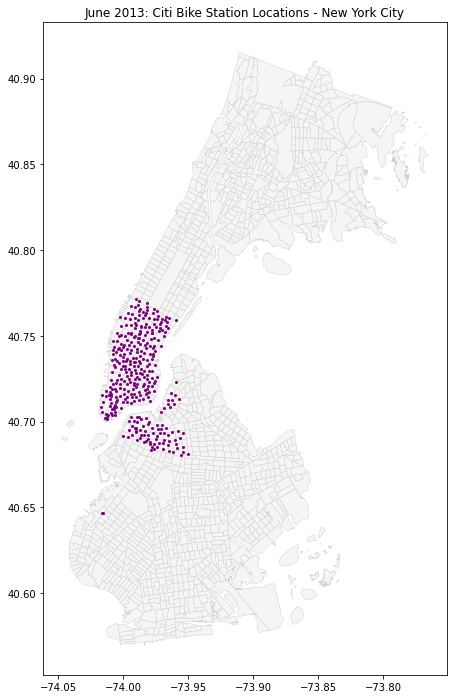

In [61]:
ax = cenTract.plot(figsize = (15, 12), color = "whitesmoke", edgecolor = "lightgrey", linewidth = 0.5)
nyc_201306_gdf.plot(ax=ax, color="Purple", markersize=4)
plt.title("June 2013: Citi Bike Station Locations - New York City")

In [96]:
def geoify_df(station_df):
    #convert hr_df to geodataframe to plot the bike stations on map
    geometry = [Point(xy) for xy in zip(station_df.long, station_df.lat)]
    crs = 4326
    station_gdf = gpd.GeoDataFrame(station_df, crs=crs, geometry=geometry)
    return station_gdf

In [133]:
def station_df(list_df, filenames=['nyc_stations.csv']):
    filtered_gdf = []
    count = 0
    
    #for every df in the list of df sent in
    for df in list_df:
        #rename all of the columns to get rid of spaces
        df = df.rename(columns={'start station id': 'start_station_id', 'start station name': 'start_station_name',
                                       'start station latitude': 'start_station_latitude', 
                                        'start station longitude': 'start_station_longitude', 
                                       'end station id': 'end_station_id', 'end station name': 'end_station_name',
                                       'end station latitude': 'end_station_latitude', 
                                        'end station longitude': 'end_station_longitude', 'birth year': 'birth_year'})
        
        df['start_station_id'] = df.start_station_id.astype(int)
        df['end_station_id'] = df.start_station_id.astype(int)
        ##filter for start station locations
        stations_df = df.drop_duplicates(subset='start_station_id')
        stations_df = stations_df.reset_index()
        stations_df = stations_df.drop(columns=['index', 'tripduration', 'starttime', 'stoptime', 'bikeid',
                                                      'usertype','birth_year','gender','end_station_id', 'end_station_name',
                                                     'end_station_latitude', 'end_station_longitude'])
        stations_df = stations_df.rename(columns = {'start_station_id':'station_id', 'start_station_name': 'station_name',
                                                         'start_station_latitude': 'lat', 'start_station_longitude': 'long'})
        ## filter for end station locations
        end_stations_df = df.drop_duplicates(subset='end_station_id')
        end_stations_df = end_stations_df.reset_index()
        end_stations_df = end_stations_df.drop(columns=['index', 'tripduration', 'starttime', 'stoptime', 
                                                              'bikeid','usertype','birth_year','gender', 'start_station_id',
                                                             'start_station_name','start_station_latitude','start_station_longitude'])
        end_stations_df = end_stations_df.rename(columns={'end_station_id':'station_id', 'end_station_name': 'station_name',
                                                               'end_station_latitude': 'lat', 'end_station_longitude': 'long'})

        #concat the two dataframes together and drop duplicates once more
        nyc_stations_df = pd.concat([stations_df, end_stations_df])
        nyc_stations_df = nyc_stations_df.drop_duplicates(subset='station_id')
        nyc_stations_df = nyc_stations_df.reset_index()
        nyc_stations_df = nyc_stations_df.drop(columns=['index'])

        #save the data frame
        try:
            nyc_stations_df.to_csv('../Data/NYC/stations/'+filenames[count])
        except:
            print('Cannot convert dataframe to csv.')
        
        filtered_gdf.append(geoify_df(nyc_stations_df))
        count += 1
        
    return filtered_gdf

## Showing Growth of System over 1 year

In [134]:
#set path to access all json files in January folder
data_dir = Path('../Data') / 'NYC/TripData'
data_files = data_dir.glob('*.csv')

list_df = []
filenames = []

for file in data_files:
    print(file)
    df = pd.read_csv(file)
    list_df.append(df)
    filepath = str(file).split('/')
    filename = filepath[4]
    filenames.append(filename)
    
filtered_gdf = station_df(list_df, filenames)

../Data/NYC/TripData/201309-citibike-tripdata.csv
../Data/NYC/TripData/202101-citibike-tripdata.csv
../Data/NYC/TripData/201311-citibike-tripdata.csv
../Data/NYC/TripData/201307-citibike-tripdata.csv
../Data/NYC/TripData/201401-citibike-tripdata.csv
../Data/NYC/TripData/201404-citibike-tripdata.csv
../Data/NYC/TripData/201412-citibike-tripdata.csv
../Data/NYC/TripData/201308-citibike-tripdata.csv
../Data/NYC/TripData/201306-citibike-tripdata.csv
../Data/NYC/TripData/201310-citibike-tripdata.csv
../Data/NYC/TripData/201402-citibike-tripdata.csv
../Data/NYC/TripData/201312-citibike-tripdata.csv


Text(0.5, 1.0, '201309-citibike-tripdata.csv')

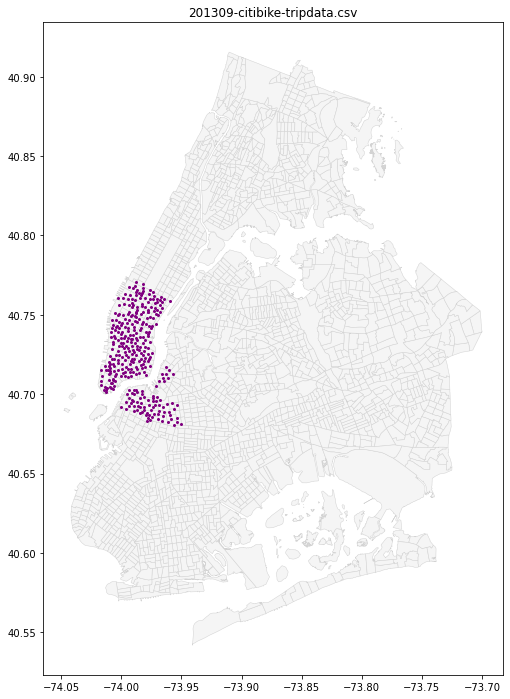

In [135]:
ax = cenTract.plot(figsize = (15, 12), color = "whitesmoke", edgecolor = "lightgrey", linewidth = 0.5)
filtered_gdf[0].plot(ax=ax, color="Purple", markersize=4)
plt.title(filenames[0])

Text(0.5, 1.0, '201401-citibike-tripdata.csv')

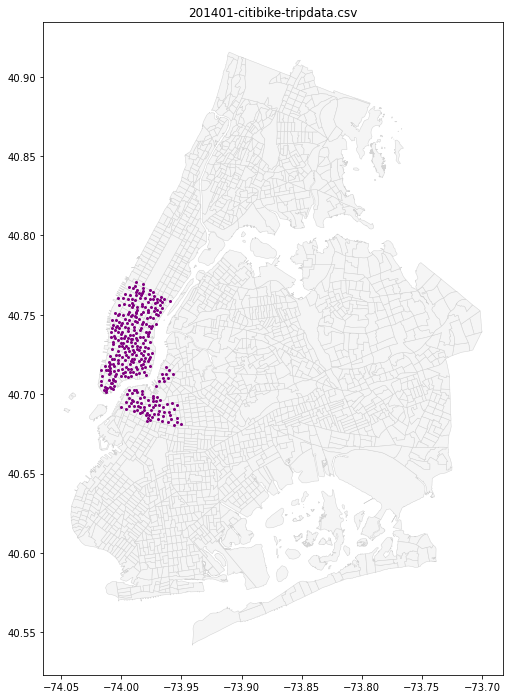

In [140]:
ax = cenTract.plot(figsize = (15, 12), color = "whitesmoke", edgecolor = "lightgrey", linewidth = 0.5)
filtered_gdf[4].plot(ax=ax, color="Purple", markersize=4)
plt.title(filenames[4])

Text(0.5, 1.0, '202101-citibike-tripdata.csv')

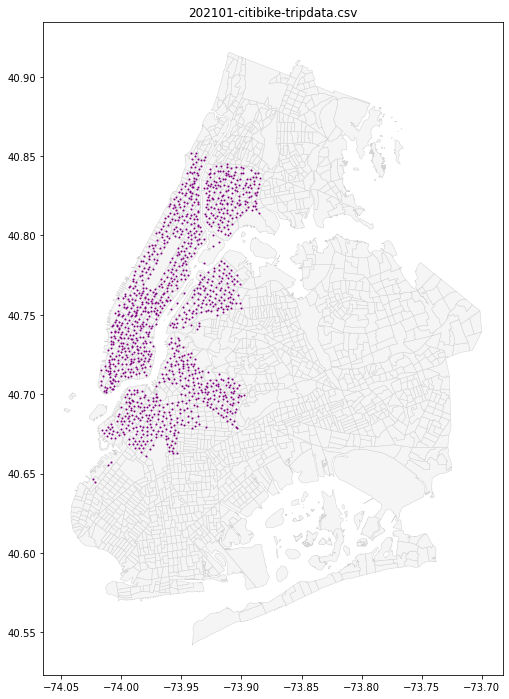

In [142]:
ax = cenTract.plot(figsize = (15, 12), color = "whitesmoke", edgecolor = "lightgrey", linewidth = 0.5)
filtered_gdf[1].plot(ax=ax, color="Purple", markersize=1)
plt.title(filenames[1])

In [ ]:
# if a bike station is not in the latest data set then remove the census tract from the shapefile
contains = []
for row, col in cenTract.iterrows():
    for row1, col1 in filtered_gdf[1].iterrows():
        if cenTract.loc[row]['geometry'].contains(filtered_gdf[1].loc[row1]['geometry']):
            contains.append(row)
            print(row)

for row, col in cenTract.iterrows():
    if row in contains:
        cenTract = cenTract.drop(row)
        
cenTract

1
1
1
2
2
2
3
4
4
4
4
6
6
7
7
7
7
9
9
10
11
12
13
14
14
15
17
18
21
21
22
22
22
35
35
36
36
37
37
38
39
39
40
41
41
51
51
58
58
60
60
62
62
62
68
71
71
79
84
87
87
91
93
109
109
109
110
111
115
115
115
117
117
117
120
122
125
125
125
127
129
129
129
131
133
133
133
135
137
137
147
147
148
148
149
150
150
150
155
155
177
177
185
185
185
295
295
302
303
304
304
304
305
305
305
308
309
314
315
357
357
358
358
358
359
360
367
369
369
371
371
371
372
372
372
372
381
381
382
384
385
389
389
465
466
467
467
468
468
469
474
474
474
475
475
475
566
566
582
583
584
584
585
585
585
585
591
591
599
599
599
604
605
621
621
621
621
627
627
627
634
635
636
637
637
638
638
640
646
659
665
665
666
666
678
678
678
678
679
679
683
683
684
684
685
685
685
687
688
690
691
691
692
692
693
693
693
693
698
698
700
701
701
702
703
703
704
704
704
705
705
705
716
716
716
728
728
730
730
730
731
731
732
733
736
736
736
737
739
752
752
752
752
767
770
777
777
778
794
799
800
801
803
803
803
804
804
804
804
805
81

In [ ]:
ax = cenTract.plot(figsize = (15, 12), color = "whitesmoke", edgecolor = "lightgrey", linewidth = 0.5)
filtered_gdf[1].plot(ax=ax, color="Purple", markersize=1)
plt.title(filenames[1])